<h1>Árvore de decisão </h1>

#### Bibliotecas usadas:

In [1]:
import csv, itertools, graphviz
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import tree

/home/alvaro/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Vamos buscar os dados
with open("winequality-red.csv",'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    row = next(reader)
    nome_colunas = np.array(row) 
    visa_X = []  
    visa_Y = []
    i = 0;
    for row in reader:        
        visa_X.append(row)
        visa_Y.append(row[11])        
    visa_X = np.array(visa_X)
    visa_Y = np.array(visa_Y)

In [3]:
#Escolhendo os atributos
#2 - Acido citrico
#8 - Ph
#9 - Sulfato
#10 - Alcool
visa_X = visa_X[:,[2, 8, 9, 10]]
nome_colunas = nome_colunas[[2, 8, 9, 10]]
print(nome_colunas)

['acido_citrico' 'ph' 'sulfato' 'alcool']


In [22]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
dataset = pandas.read_csv('winequality-red.csv');
dataset.hist()
# plt.show()
plt.savefig('histograma.png')

In [5]:
print(dataset.describe())

       acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  \
count  1599.000000     1599.000000    1599.000000      1599.000000   
mean      8.319637       84.830550       0.270976         2.538806   
std       1.741096      234.417251       0.194801         1.409928   
min       4.600000        0.120000       0.000000         0.900000   
25%       7.100000        0.400000       0.090000         1.900000   
50%       7.900000        0.520000       0.260000         2.200000   
75%       9.200000        0.660000       0.420000         2.600000   
max      15.900000     1185.000000       1.000000        15.500000   

          cloretos  dioxido_enxofre_livre  dioxido_enxofre_total    densidade  \
count  1599.000000            1599.000000            1599.000000  1599.000000   
mean     57.179161              15.874922              46.467792    52.086319   
std      56.377136              10.460157              32.895324   219.813666   
min       0.041000               1.000000    

In [6]:
#Training
x_train,x_test,y_train,y_test = train_test_split(visa_X,visa_Y,
                                                  test_size=0.3,
                                                  random_state=22)

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,
                                   min_samples_leaf=5)

In [8]:
clf = clf.fit(x_train,y_train)

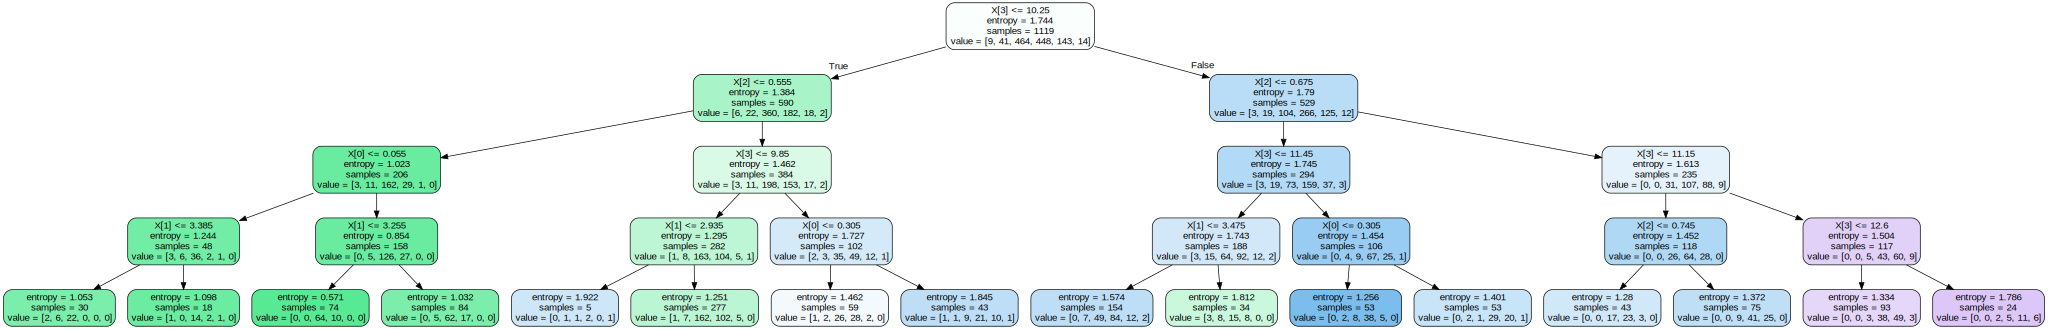

In [19]:
data_exp = tree.export_graphviz(clf, out_file=None,filled=True,rounded=True) 
graph = graphviz.Source(data_exp)
graph

In [10]:
def accuracy(tree,x_test,y_test):
    predict = clf.predict(x_test)
    erro = 0.0
    for x in range(len(predict)):
        if predict[x] != y_test[x]:
            erro += 1.
    acuracy = (1-(erro/len(predict)))
    return acuracy
accuracy(clf,x_test,y_test)

0.5645833333333333

In [11]:
#1 - Ácido citrico
#2 - Ph
#3 - Sulfato
#4 - Alcool
novos_casos = [[0.04, 3.26, 0.65, 9.8], [0.08, 3.38, 0.5, 9]]

In [12]:
predict_novos_casos = clf.predict(novos_casos)

In [13]:
print(predict_novos_casos)

['5' '5']
